In [40]:
%load_ext autoreload
%autoreload 2
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
project_dir = Path(os.environ['CONDA_PREFIX']).parent.absolute()
current_dir = project_dir / 'scratch/ana/result/kyotoRate'

In [42]:
files = sorted(list(current_dir.glob('data*.txt')))
df_list = [
    pd.read_csv(str(f), sep=r'\s+', header=None, names=['Mch', 'count', 'P(Mch>=x)']) for f in files
]

df_multi_list = [
    pd.DataFrame({
        'x': df['Mch'],
        'y': df['count'],
    }) for df in df_list
]

df_centrality_list = [
    pd.DataFrame({
        'x': df['Mch'],
        'y': df['P(Mch>=x)'],
    }) for df in df_list
]

run_ids = [int(re.findall(r'data(\d+).txt', str(f))[0]) for f in files]


In [43]:
for i in range(len(df_centrality_list)):
    df_centrality_list[i] = df_centrality_list[i].query('x >= 1')
    df_centrality_list[i].x = df_centrality_list[i]['x'] - 0.5

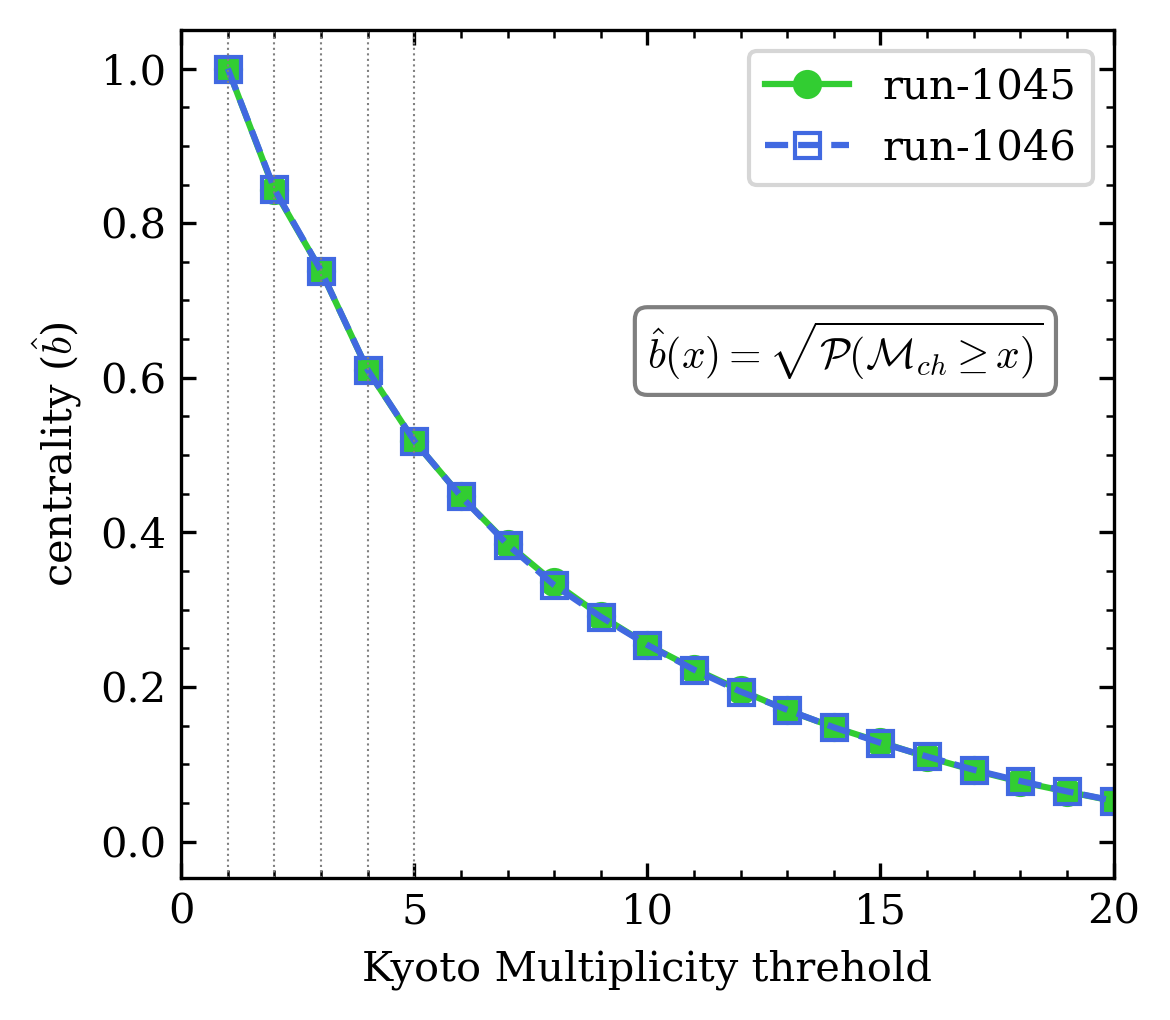

In [44]:
colors = ['limegreen', 'royalblue']
linestyles = ['-', '--']
markers = ['o', 's']
labels = [f'run-{idx}' for idx in run_ids]
mfcs = [None, 'none']

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
for i in range(len(df_centrality_list)):
    ax.plot(
        df_centrality_list[i].x, 
        np.sqrt(df_centrality_list[i].y ), 
        marker=markers[i], color=colors[i], label=labels[i],
        linestyle=linestyles[i], markerfacecolor=mfcs[i]
    )

ax.set_xlim(0, 20)

for x in df_centrality_list[0].x.values[:5]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.legend()
ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel(r'centrality ($\hat{b}$)')

ax.annotate(
    r'$\hat{b}(x) = \sqrt{\mathcal{P}(\mathcal{M}_{ch} \geq x)} $',
    xy=(0.5, 0.5), xycoords='axes fraction',
    xytext=(0.5, 0.6), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()

(0.0, 25.0)

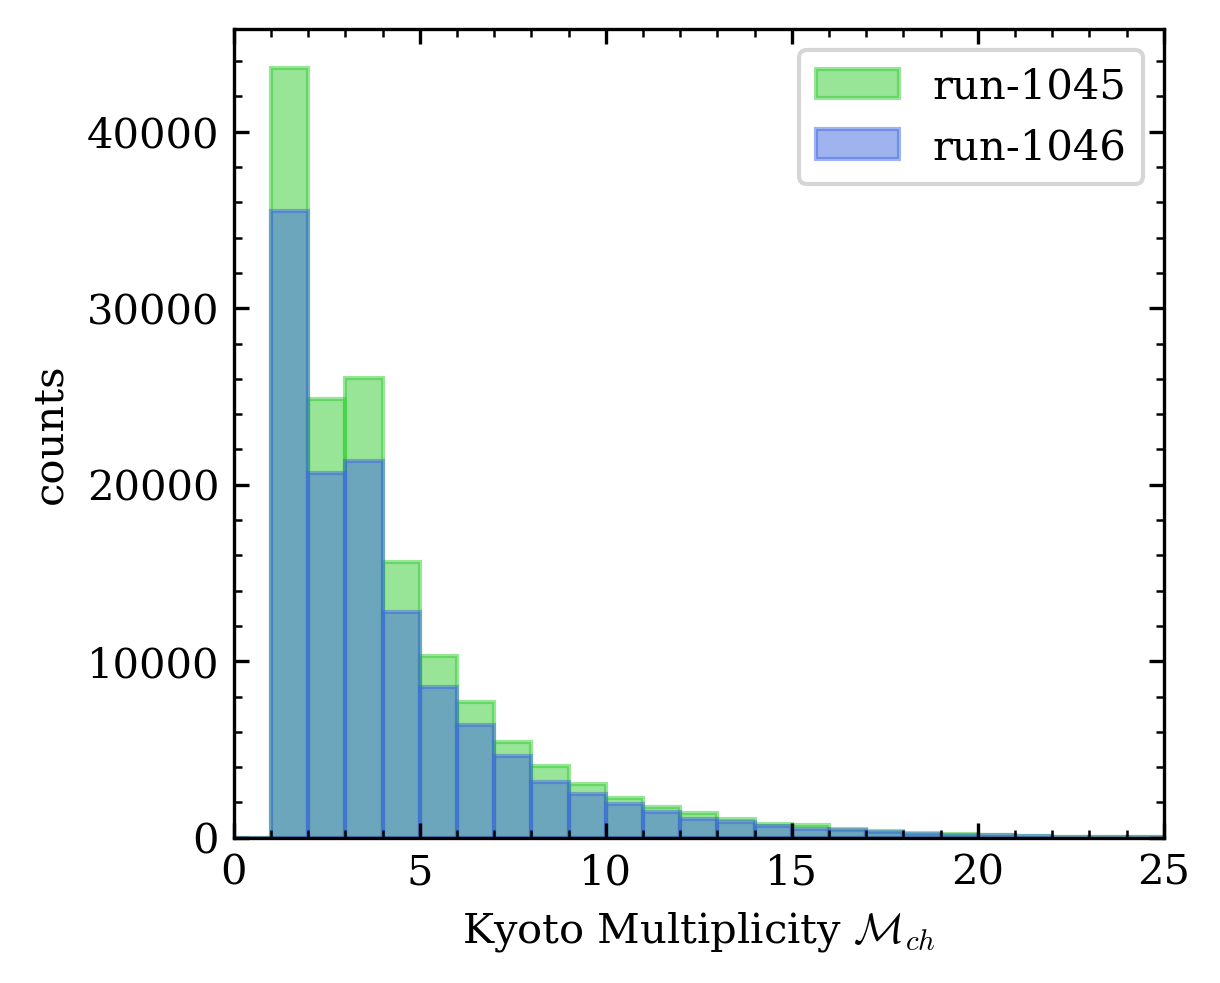

In [45]:
fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
alphas = [0.5, 0.5]
for i in range(len(df_multi_list)):
    ax.hist(
        df_multi_list[i].x, 
        weights = df_multi_list[i].y, 
        color=colors[i], label=labels[i],
        bins = 30,
        range= (0, 30),
        # histtype='step',
        histtype='bar',
        # histtype='stepfilled',
        # histtype='barstacked',
        alpha=alphas[i],
        edgecolor=colors[i],
    )

ax.legend()
ax.set_xlabel(r'Kyoto Multiplicity $\mathcal{M}_{ch}$')
ax.set_ylabel('counts')
ax.set_xlim(0,25)


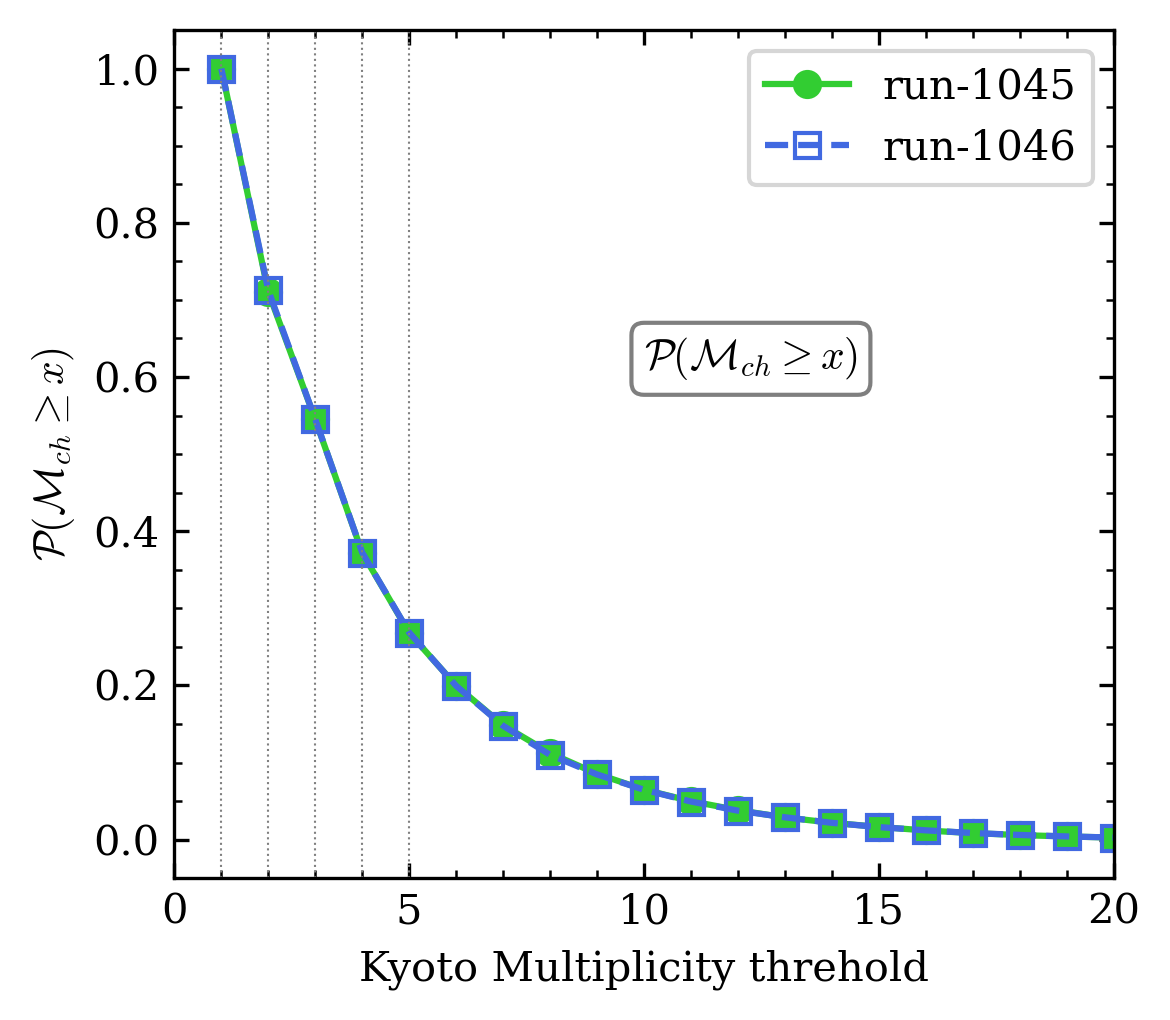

In [46]:
colors = ['limegreen', 'royalblue']
linestyles = ['-', '--']
markers = ['o', 's']
labels = [f'run-{idx}' for idx in run_ids]
mfcs = [None, 'none']

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
for i in range(len(df_centrality_list)):
    ax.plot(
        df_centrality_list[i].x, 
        df_centrality_list[i].y, 
        marker=markers[i], color=colors[i], label=labels[i],
        linestyle=linestyles[i], markerfacecolor=mfcs[i]
    )

ax.set_xlim(0, 20)

for x in df_centrality_list[0].x.values[:5]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.legend()
ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel(r'$\mathcal{P}(\mathcal{M}_{ch} \geq x) $')

ax.annotate(
    r'$\mathcal{P}(\mathcal{M}_{ch} \geq x) $',
    xy=(0.5, 0.5), xycoords='axes fraction',
    xytext=(0.5, 0.6), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()

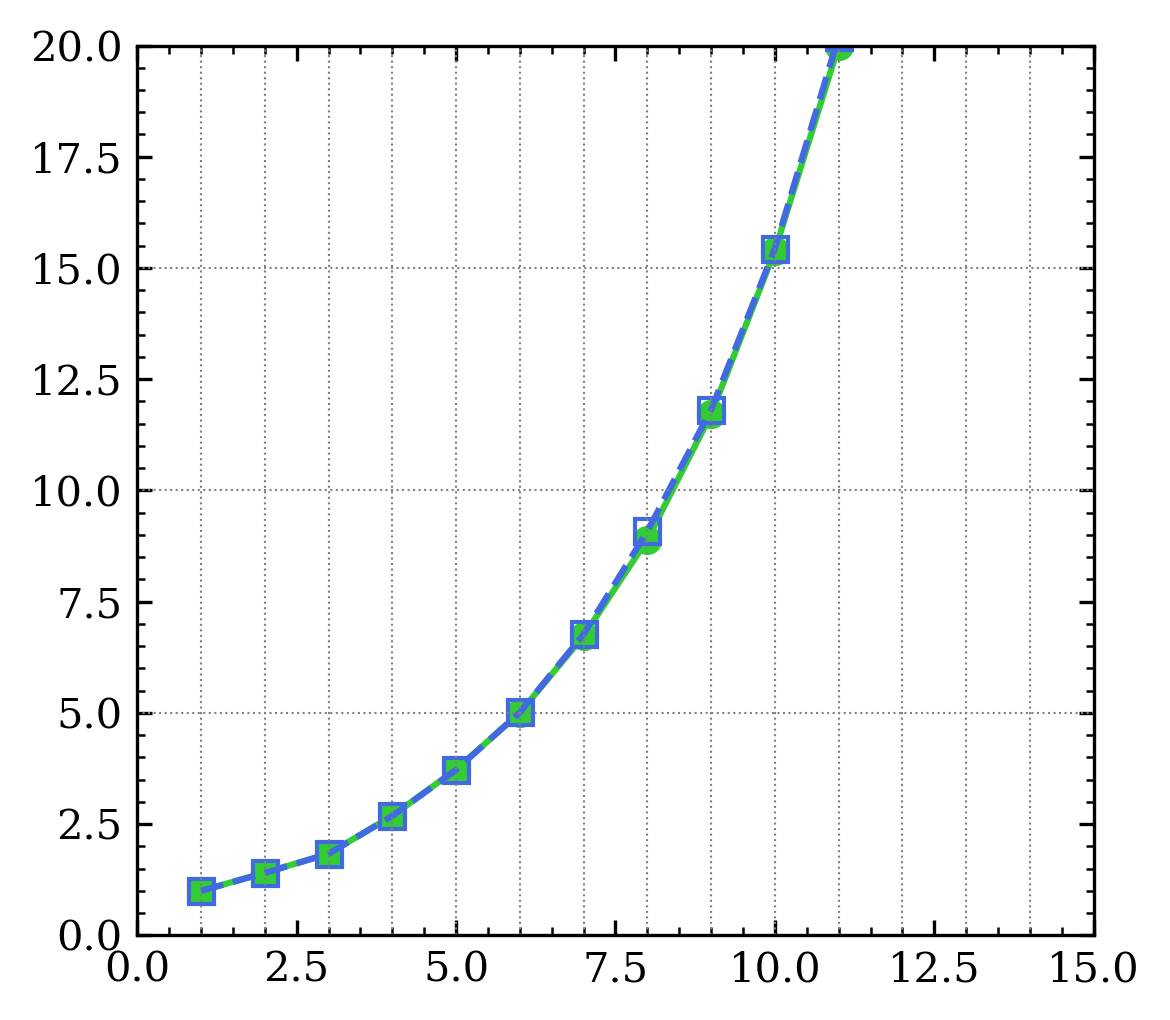

In [47]:
colors = ['limegreen', 'royalblue']
linestyles = ['-', '--']
markers = ['o', 's']
labels = [f'run-{idx}' for idx in run_ids]
mfcs = [None, 'none']

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
for i in range(len(df_centrality_list)):
    df = df_centrality_list[i].copy().query('y > 0.01')
    ax.plot(
        df.x, 
        1. / df.y, 
        marker=markers[i], color=colors[i], label=labels[i],
        linestyle=linestyles[i], markerfacecolor=mfcs[i]
    )

ax.set_xlim(0, 15)
ax.set_ylim(0, 20)

for x in df_centrality_list[0].x.values[:15]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)
for y in np.arange(0, 20, 5):
    ax.axhline(y, color='gray', linestyle=':', linewidth=0.5)

# ax.legend()
# ax.set_xlabel('Kyoto Multiplicity threhold')
# ax.set_ylabel(r'$\mathcal{P}(\mathcal{M}_{ch} \geq x) $')

# ax.annotate(
#     r'$\mathcal{P}(\mathcal{M}_{ch} \geq x) $',
#     xy=(0.5, 0.5), xycoords='axes fraction',
#     xytext=(0.5, 0.6), textcoords='axes fraction',
#     bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
# )

fig.tight_layout()
plt.show()

In [48]:
ref_multi = 5

In [60]:
df_rate_conversion_list = []
for i in range(len(df_centrality_list)):
    ref = df_centrality_list[0].query('x == @ref_multi')['y'].values[0]

    df_rate_conversion_list.append(
        pd.DataFrame({
            'x': df_centrality_list[i].x,
            'y': df_centrality_list[i].y / ref,
        })
    )

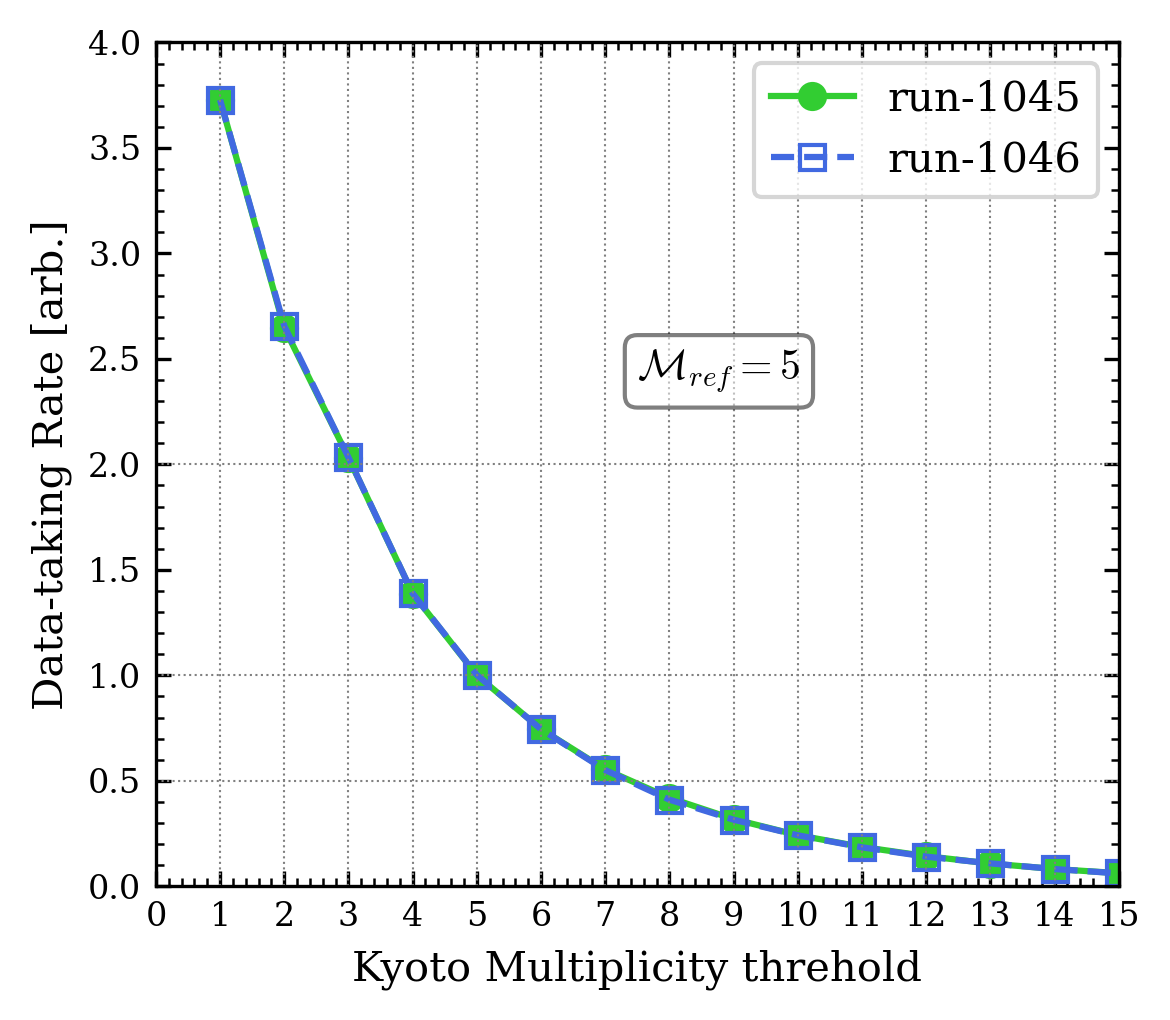

In [61]:
colors = ['limegreen', 'royalblue']
linestyles = ['-', '--']
markers = ['o', 's']
labels = [f'run-{idx}' for idx in run_ids]
mfcs = [None, 'none']

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
for i in range(len(df_rate_conversion_list)):
    df = df_rate_conversion_list[i].copy().query('y > 0.01')
    ax.plot(
        df.x, 
        df.y, 
        marker=markers[i], color=colors[i], label=labels[i],
        linestyle=linestyles[i], markerfacecolor=mfcs[i]
    )

ax.set_xlim(0, 15)
ax.set_ylim(0, 4)
ax.set_xticks(range(0, 16))
ax.set_yticks([i * 0.5 for i in range(9)])
ax.set_xticklabels(range(0, 16), fontsize=8)
ax.set_yticklabels([i * 0.5 for i in range(9)], fontsize=8)

for x in df_rate_conversion_list[0].x.values[:15]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.axhline(0.5, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(1.0, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(2.0, color='gray', linestyle=':', linewidth=0.5)

ax.legend()
ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel('Data-taking Rate [arb.]')

ax.annotate(
    r'$\mathcal{M}_{ref} = 5$',
    xy=(0.5, 0.5), xycoords='axes fraction',
    xytext=(0.5, 0.6), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()